In [ ]:
# !git clone https://github.com/finterstellar/finterstellar.git

In [ ]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.1.3

In [ ]:
# !pip uninstall scikit-learn

In [ ]:
# !pip install scikit-learn==0.23.2

In [ ]:
# !pip install -U finance-datareader
# !pip install yfinance

In [ ]:
# !pip install pycaret[full] -qqq

In [ ]:
# !pip install finterstellar

In [ ]:
# ta library
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/

# !pip install ta

In [ ]:
from sklearn.cluster import KMeans
import warnings, random
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler

# 데이터 준비

In [ ]:
import FinanceDataReader as fdr

korean_list = fdr.StockListing('Krx')
korean_list

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7890,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7891,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7892,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7893,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
print(korean_list.loc[korean_list['Name'] == '팬오션'])

      Symbol Market Name  Sector         Industry ListingDate SettleMonth  \
5773  028670  KOSPI  팬오션  해상 운송업  해상화물운송(외항,운수보관)  2007-09-21         12월   

         Representative                 HomePage Region  
5773  김홍국, 안중호(각자 대표이사)  http://www.panocean.com  서울특별시  


In [ ]:
import yfinance as yf
# 팬오션 = 028670  
List= yf.download('028670.KS',
                      start='2018-06-01',
                       end = '2022-01-10',
                       action='inline',
                      progress=False)

In [ ]:
data = List

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,5080.0,5150.0,5060.0,5090.0,4944.369141,1269715
2018-06-04,5190.0,5220.0,5140.0,5220.0,5070.649902,1362983
2018-06-05,5250.0,5280.0,5200.0,5240.0,5090.077637,1012953
2018-06-07,5310.0,5420.0,5280.0,5380.0,5226.072266,2494345
2018-06-08,5430.0,5430.0,5300.0,5320.0,5167.788574,1278780
...,...,...,...,...,...,...
2022-01-04,5560.0,5640.0,5520.0,5580.0,5580.000000,1872407
2022-01-05,5580.0,5680.0,5560.0,5610.0,5610.000000,3196338
2022-01-06,5530.0,5760.0,5480.0,5670.0,5670.000000,3831521


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2018-06-01 to 2022-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       889 non-null    float64
 1   High       889 non-null    float64
 2   Low        889 non-null    float64
 3   Close      889 non-null    float64
 4   Adj Close  889 non-null    float64
 5   Volume     889 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.6 KB


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,5080.0,5150.0,5060.0,5090.0,4944.369141,1269715
2018-06-04,5190.0,5220.0,5140.0,5220.0,5070.649902,1362983
2018-06-05,5250.0,5280.0,5200.0,5240.0,5090.077637,1012953
2018-06-07,5310.0,5420.0,5280.0,5380.0,5226.072266,2494345
2018-06-08,5430.0,5430.0,5300.0,5320.0,5167.788574,1278780


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,5560.0,5640.0,5520.0,5580.0,5580.0,1872407
2022-01-05,5580.0,5680.0,5560.0,5610.0,5610.0,3196338
2022-01-06,5530.0,5760.0,5480.0,5670.0,5670.0,3831521
2022-01-07,5720.0,5720.0,5570.0,5640.0,5640.0,2356699
2022-01-10,5640.0,5830.0,5630.0,5800.0,5800.0,4533942


In [ ]:
# Close(종가)는 삭제하고 Adj Close(수정된 종가)를 사용
data.drop(columns = ['Close'], inplace = True)
data.rename(columns = {'Adj Close' : 'Close'}, inplace = True)
# chage(변화량), chage_rate(변화율) 추가
# 변화량
data['Change'] = [data.iloc[i]['Close']-data.iloc[i-1]['Close'] for i in range(len(data))]
# 변화율
data['Change_rate'] = [(data.iloc[i]['Close']-data.iloc[i-1]['Close'])/data.iloc[i-1]['Close']*100 for i in range(len(data))]
data

,Open,High,Low,Close,Volume,Change,Change_rate
Date,,,,,,,
2018-06-01,5080.0,5150.0,5060.0,4944.369141,1269715,-855.630859,-14.752256
2018-06-04,5190.0,5220.0,5140.0,5070.649902,1362983,126.280762,2.554032
2018-06-05,5250.0,5280.0,5200.0,5090.077637,1012953,19.427734,0.383141
2018-06-07,5310.0,5420.0,5280.0,5226.072266,2494345,135.994629,2.671759
2018-06-08,5430.0,5430.0,5300.0,5167.788574,1278780,-58.283691,-1.115248
...,...,...,...,...,...,...,...
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634
2022-01-06,5530.0,5760.0,5480.0,5670.000000,3831521,60.000000,1.069519


## 각종지수 feature로 추가

In [ ]:
import pandas as pd
import numpy as np
import ta

### 볼린저 밴드

In [ ]:
# 하이밴드
# ta.volatility.bollinger_hband(close, window=20, window_dev=2, fillna=False)
data['boll_HB'] = ta.volatility.bollinger_hband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_HB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# 로우밴드
# ta.volatility.bollinger_lband(close, window=20, window_dev=2, fillna=False)
data['boll_LB'] = ta.volatility.bollinger_lband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_LB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

### RSI

In [ ]:
# ta.momentum.rsi(close, window=14, fillna=False) → pandas.core.series.Series
data['rsi'] = ta.momentum.rsi(data['Close'])

In [ ]:
data['rsi']

Date
2018-06-01          NaN
2018-06-04          NaN
2018-06-05          NaN
2018-06-07          NaN
2018-06-08          NaN
                ...    
2022-01-04    53.322827
2022-01-05    54.387969
2022-01-06    56.524747
2022-01-07    55.133981
2022-01-10    60.689309
Name: rsi, Length: 889, dtype: float64

In [ ]:
# 30 이하 1 70이상 -1 그 외 0
def make_rissignal(value):
    if value <= 30: 
        return 1
    elif value <= 70:
        return 0
    else:
        return -1


In [ ]:
data['rsi_signal'] = data['rsi'].apply(lambda x : make_rissignal(x))

### 단순이동 평균

In [ ]:
# 단순 이동평균 SMA (Simple Moving Average)
data['sma5'] = data['Close'].rolling(5).mean()
data['sma20'] = data['Close'].rolling(20).mean()
data['sma60'] = data['Close'].rolling(60).mean()
data['sma120'] = data['Close'].rolling(120).mean()

### WMA 가중평균

In [ ]:
# WMA 가중평균
# ta.trend.wma_indicator(close, window=9, fillna=False)
data['WMA'] = ta.trend.wma_indicator(data['Close'], window=9, fillna=False)

### EMV 단순이동

In [ ]:
# EMV 단순이동
# ta.volume.ease_of_movement(high, low, volume, window=14, fillna=False)
data['EMV'] = ta.volume.ease_of_movement(data['High'], data['Low'], data['Volume'], window=14, fillna=False)

### macd

In [ ]:
# macd
# macd = ta.trend.macd(close) 12일 지수이동평균 - 26일 지수이동평균
# macdsignal = ta.trend.macd_signal(close) MACD의 9일 지수이동평균
# ta.trend.MACD(close: pandas.core.series.Series, 
# window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
data['macd'] = ta.trend.macd(data['Close'])
data['macdsignal'] = ta.trend.macd_signal(data['Close'])

### 모멘텀

In [ ]:
# 모멘텀 awesome_oscillator
# ta.momentum.AwesomeOscillatorIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, window1: int = 5, window2: int = 34, fillna: bool = False)
data['awesome_oscillator'] = ta.momentum.awesome_oscillator(data['High'], data['Low'], 5, 34, False )

### williams_r

In [ ]:
# williams_r
# ta.momentum.williams_r(high, low, close, lbp=14, fillna=False)
data['williams_r'] = ta.momentum.williams_r(data['High'], data['Low'], data['Close'], lbp=14, fillna=False)

## 타겟설정

In [ ]:
# 등락률 : 어제보다 올랐으면 1 그밖은 0
data['upNdown']=[1 if x>0 else 0 for x in data['Change']]
#하루전 등락
data['upNdown_1ago']=data['upNdown'].shift(1)
#이틀전 등락
data['upNdown_2ago']=data['upNdown'].shift(2)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,sma120,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,5080.0,5150.0,5060.0,4944.369141,1269715,-855.630859,-14.752256,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-06-04,5190.0,5220.0,5140.0,5070.649902,1362983,126.280762,2.554032,NaN,0.0,NaN,...,NaN,NaN,440210.919725,NaN,NaN,NaN,NaN,1,0.0,NaN
2018-06-05,5250.0,5280.0,5200.0,5090.077637,1012953,19.427734,0.383141,NaN,0.0,NaN,...,NaN,NaN,473862.064676,NaN,NaN,NaN,NaN,1,1.0,0.0
2018-06-07,5310.0,5420.0,5280.0,5226.072266,2494345,135.994629,2.671759,NaN,0.0,NaN,...,NaN,NaN,617396.550998,NaN,NaN,NaN,NaN,1,1.0,1.0
2018-06-08,5430.0,5430.0,5300.0,5167.788574,1278780,-58.283691,-1.115248,NaN,0.0,NaN,...,NaN,NaN,152489.091165,NaN,NaN,NaN,NaN,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,6575.244348,5447.306250,640886.303031,-35.974498,-60.828831,-42.294118,-40.000000,1,0.0,1.0
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,6557.048470,5483.478461,150171.852914,-20.764397,-52.815944,-11.529412,-32.500000,1,1.0,0.0
2022-01-06,5530.0,5760.0,5480.0,5670.000000,3831521,60.000000,1.069519,5687.493024,0.0,5273.743011,...,6539.925163,5527.387446,0.000000,-3.824695,-43.017695,26.029412,-21.428571,1,1.0,1.0


In [ ]:
# 내일의 등락률 즉 내일 예측을 위해 하루를 땅김
data['Target']=data['upNdown'].shift(-1)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,5080.0,5150.0,5060.0,4944.369141,1269715,-855.630859,-14.752256,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1.0
2018-06-04,5190.0,5220.0,5140.0,5070.649902,1362983,126.280762,2.554032,NaN,0.0,NaN,...,NaN,440210.919725,NaN,NaN,NaN,NaN,1,0.0,NaN,1.0
2018-06-05,5250.0,5280.0,5200.0,5090.077637,1012953,19.427734,0.383141,NaN,0.0,NaN,...,NaN,473862.064676,NaN,NaN,NaN,NaN,1,1.0,0.0,1.0
2018-06-07,5310.0,5420.0,5280.0,5226.072266,2494345,135.994629,2.671759,NaN,0.0,NaN,...,NaN,617396.550998,NaN,NaN,NaN,NaN,1,1.0,1.0,0.0
2018-06-08,5430.0,5430.0,5300.0,5167.788574,1278780,-58.283691,-1.115248,NaN,0.0,NaN,...,NaN,152489.091165,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,5447.306250,640886.303031,-35.974498,-60.828831,-42.294118,-40.000000,1,0.0,1.0,1.0
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,5483.478461,150171.852914,-20.764397,-52.815944,-11.529412,-32.500000,1,1.0,0.0,1.0
2022-01-06,5530.0,5760.0,5480.0,5670.000000,3831521,60.000000,1.069519,5687.493024,0.0,5273.743011,...,5527.387446,0.000000,-3.824695,-43.017695,26.029412,-21.428571,1,1.0,1.0,0.0


In [ ]:
# data=data.drop('upNdown',axis=1)
data = data.dropna()

In [ ]:
data=data[22:]

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,4380.0,4500.0,4380.0,4317.823242,960612,53.426270,1.252845,4575.324903,0.0,4124.433325,...,4252.740305,1.499044e+06,-55.276522,-48.138349,-117.691176,-61.668726,1,1.0,0.0,0.0
2019-01-02,4445.0,4500.0,4390.0,4317.823242,702083,0.000000,0.000000,4564.446418,0.0,4122.198040,...,4258.028961,7.833832e+04,-49.019532,-48.314586,-109.235294,-61.668726,0,1.0,1.0,0.0
2019-01-03,4510.0,4510.0,4375.0,4269.253906,715447,-48.569336,-1.124857,4539.142885,0.0,4122.731163,...,4256.194124,-4.717331e+04,-47.433182,-48.138305,-90.500000,-71.580835,0,0.0,1.0,1.0
2019-01-04,4365.0,4495.0,4325.0,4337.250977,666644,67.997070,1.592716,4509.445830,0.0,4133.486128,...,4270.764931,-8.287782e+05,-40.225498,-46.555743,-47.397059,-57.703882,1,0.0,0.0,1.0
2019-01-07,4520.0,4580.0,4485.0,4390.677246,893089,53.426270,1.231800,4512.567085,0.0,4133.279034,...,4297.100309,1.303062e+06,-29.858117,-43.216218,-10.558824,-43.940377,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,5560.0,5570.0,5390.0,5410.000000,1852154,-130.000000,-2.346570,5655.650695,0.0,5285.275330,...,5413.755599,-1.943683e+05,-51.810307,-67.042415,-55.676471,-85.714286,0,1.0,0.0,1.0
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,5447.306250,6.408863e+05,-35.974498,-60.828831,-42.294118,-40.000000,1,0.0,1.0,1.0
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,5483.478461,1.501719e+05,-20.764397,-52.815944,-11.529412,-32.500000,1,1.0,0.0,1.0


## 클러스터링

In [ ]:
kmeans_data = data.drop(['upNdown','upNdown_1ago','upNdown_2ago','Target'], axis=1)
kmeans = KMeans(n_clusters=8, random_state=42).fit(kmeans_data)
data['cluster'] = kmeans.predict(kmeans_data)

# pycaret

In [ ]:
from pycaret.classification import * 

In [ ]:
# Importing module and initializing setup 

clf = setup(data = data, target='Target', train_size=0.8, silent=True, use_gpu =True)

,Description,Value
0,session_id,4229
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(745, 28)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# return best model based on AUC 
best = compare_models(sort = 'AUC') #default is 'Accuracy' 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5453,0.5799,0.5121,0.5316,0.5208,0.0885,0.0888,0.268
lightgbm,Light Gradient Boosting Machine,0.5486,0.5714,0.4979,0.5363,0.5159,0.0942,0.0945,0.089
dt,Decision Tree Classifier,0.5603,0.5609,0.5744,0.5448,0.5582,0.1216,0.1223,0.019
catboost,CatBoost Classifier,0.5486,0.5400,0.4980,0.5356,0.5144,0.0942,0.0952,2.503
rf,Random Forest Classifier,0.5168,0.5390,0.4431,0.5004,0.4679,0.0297,0.0296,1.061
ada,Ada Boost Classifier,0.5117,0.5341,0.4569,0.5041,0.4738,0.0205,0.0228,0.157
lr,Logistic Regression,0.5387,0.5332,0.3076,0.5524,0.3873,0.0637,0.0743,0.043
et,Extra Trees Classifier,0.5017,0.5203,0.4634,0.4823,0.4707,0.0007,0.0011,0.993
knn,K Neighbors Classifier,0.5234,0.5077,0.4605,0.5094,0.4827,0.0433,0.0436,0.201
gbc,Gradient Boosting Classifier,0.5016,0.5030,0.4670,0.4837,0.4736,0.0008,0.0009,0.268


In [ ]:
#xgboost, lightgbm, catboost

## m1

In [ ]:
m1 = create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6167  0.7108  0.6552  0.5938  0.6230  0.2350  0.2362
       1       0.6000  0.6407  0.5517  0.5926  0.5714  0.1973  0.1978
       2       0.5000  0.5417  0.4138  0.4800  0.4444 -0.0056 -0.0056
       3       0.4667  0.4983  0.4138  0.4444  0.4286 -0.0702 -0.0704
       4       0.5333  0.6274  0.5172  0.5172  0.5172  0.0656  0.0656
       5       0.5833  0.6218  0.4828  0.5833  0.5283  0.1611  0.1634
       6       0.5254  0.5323  0.5000  0.5000  0.5000  0.0484  0.0484
       7       0.5424  0.5161  0.5172  0.5357  0.5263  0.0840  0.0840
       8       0.5254  0.5736  0.5172  0.5172  0.5172  0.0506  0.0506
       9       0.5593  0.5368  0.5517  0.5517  0.5517  0.1184  0.1184
       Mean    0.5453  0.5799  0.5121  0.5316  0.5208  0.0885  0.0888
       Std     0.0435  0.0642  0.0664  0.0473  0.0537  0.0878  0.0883
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [ ]:
tuned_m1 = tune_model(m1,choose_better = True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6500  0.7164  0.6897  0.6250  0.6557  0.3016  0.3031
       1       0.6167  0.6296  0.4483  0.6500  0.5306  0.2247  0.2358
       2       0.4500  0.4661  0.3103  0.4091  0.3529 -0.1099 -0.1130
       3       0.5000  0.4416  0.4483  0.4815  0.4643 -0.0033 -0.0034
       4       0.6000  0.5895  0.5862  0.5862  0.5862  0.1991  0.1991
       5       0.5500  0.5684  0.4483  0.5417  0.4906  0.0940  0.0953
       6       0.4915  0.5288  0.5357  0.4688  0.5000 -0.0126 -0.0127
       7       0.5424  0.5310  0.4483  0.5417  0.4906  0.0818  0.0831
       8       0.5763  0.5379  0.5517  0.5714  0.5614  0.1518  0.1519
       9       0.5763  0.5644  0.5517  0.5714  0.5614  0.1518  0.1519
       Mean    0.5553  0.5574  0.5018  0.5447  0.5194  0.1079  0.1091
       Std     0.0583  0.0744  0.0983  0.0699  0.0771  0.1177  0.1196
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [ ]:
predict_model(tuned_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.4966,0.4907,0.4194,0.4,0.4094,-0.0287,-0.0287


,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,EMV,...,boll_HB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,4835986.0,-49.077637,-0.823726,7437.969238,5538.119141,29.081892,6488.043945,7164.659180,7208.337891,-3.225816e+05,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.8946
1,6582563.0,-106.852783,-2.561118,4464.396973,3245.030518,57.801567,3854.713867,3579.810791,3590.657959,8.735199e+03,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9911
2,8113653.0,-98.154785,-1.293658,7768.457520,7085.335449,50.428867,7426.896484,7364.895508,6929.659668,-9.120429e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.9713
3,763790.0,14.570801,0.324675,4590.815918,4124.484863,57.056721,4357.650391,4437.465820,4691.160645,-2.945836e+04,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.9530
4,6348139.0,-235.571777,-3.592812,7900.550293,6203.338867,32.376385,7051.944336,7357.042969,7282.445312,-7.781808e+05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2087505.0,-228.276367,-6.143791,4086.984131,3646.728271,23.694118,3866.856201,4117.798340,4282.731934,-1.429338e+06,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.7240
145,1140888.0,-97.139160,-2.081171,4917.720703,4281.331055,48.617100,4599.525879,4558.080078,4427.266602,-5.094716e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5507
146,726684.0,-63.140137,-1.452511,4780.943848,4205.859375,44.833954,4493.401855,4255.492676,4308.676270,-1.393315e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0000
147,1046350.0,-82.567871,-1.795139,4988.329102,4455.027344,44.448399,4721.678223,4437.142090,4337.736816,-1.146844e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.6150


In [ ]:
final_m1 = finalize_model(tuned_m1)
print(final_m1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=220, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=4229, reg_alpha=1e-07,
              reg_lambda=1e-07, scale_pos_weight=0.8, subsample=0.3,
              tree_method='gpu_hist', use_label_encoder=True,
              validate_parameters=1, verbosity=0)


In [ ]:
predict_model(final_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9933,0.9998,0.9839,1.0,0.9919,0.9862,0.9863


,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,EMV,...,boll_HB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,4835986.0,-49.077637,-0.823726,7437.969238,5538.119141,29.081892,6488.043945,7164.659180,7208.337891,-3.225816e+05,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9834
1,6582563.0,-106.852783,-2.561118,4464.396973,3245.030518,57.801567,3854.713867,3579.810791,3590.657959,8.735199e+03,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5254
2,8113653.0,-98.154785,-1.293658,7768.457520,7085.335449,50.428867,7426.896484,7364.895508,6929.659668,-9.120429e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.9998
3,763790.0,14.570801,0.324675,4590.815918,4124.484863,57.056721,4357.650391,4437.465820,4691.160645,-2.945836e+04,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.9946
4,6348139.0,-235.571777,-3.592812,7900.550293,6203.338867,32.376385,7051.944336,7357.042969,7282.445312,-7.781808e+05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2087505.0,-228.276367,-6.143791,4086.984131,3646.728271,23.694118,3866.856201,4117.798340,4282.731934,-1.429338e+06,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9999
145,1140888.0,-97.139160,-2.081171,4917.720703,4281.331055,48.617100,4599.525879,4558.080078,4427.266602,-5.094716e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.9944
146,726684.0,-63.140137,-1.452511,4780.943848,4205.859375,44.833954,4493.401855,4255.492676,4308.676270,-1.393315e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0000
147,1046350.0,-82.567871,-1.795139,4988.329102,4455.027344,44.448399,4721.678223,4437.142090,4337.736816,-1.146844e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8742


In [ ]:
m1_predictions = predict_model(final_m1, data=data)
m1_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9987,1.0,0.9972,1.0,0.9986,0.9973,0.9973


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,4380.0,4500.0,4380.0,4317.823242,960612,53.426270,1.252845,4575.324903,0.0,4124.433325,...,-48.138349,-117.691176,-61.668726,1,1.0,0.0,0.0,4,0.0,0.9998
2019-01-02,4445.0,4500.0,4390.0,4317.823242,702083,0.000000,0.000000,4564.446418,0.0,4122.198040,...,-48.314586,-109.235294,-61.668726,0,1.0,1.0,0.0,4,0.0,0.9985
2019-01-03,4510.0,4510.0,4375.0,4269.253906,715447,-48.569336,-1.124857,4539.142885,0.0,4122.731163,...,-48.138305,-90.500000,-71.580835,0,0.0,1.0,1.0,4,1.0,0.9930
2019-01-04,4365.0,4495.0,4325.0,4337.250977,666644,67.997070,1.592716,4509.445830,0.0,4133.486128,...,-46.555743,-47.397059,-57.703882,1,0.0,0.0,1.0,4,1.0,0.9973
2019-01-07,4520.0,4580.0,4485.0,4390.677246,893089,53.426270,1.231800,4512.567085,0.0,4133.279034,...,-43.216218,-10.558824,-43.940377,1,1.0,0.0,0.0,4,0.0,0.8952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,5560.0,5570.0,5390.0,5410.000000,1852154,-130.000000,-2.346570,5655.650695,0.0,5285.275330,...,-67.042415,-55.676471,-85.714286,0,1.0,0.0,1.0,4,1.0,0.9219
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,-60.828831,-42.294118,-40.000000,1,0.0,1.0,1.0,4,1.0,0.9998
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,-52.815944,-11.529412,-32.500000,1,1.0,0.0,1.0,0,1.0,0.8661


## m2

In [ ]:
m2 = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6167  0.7041  0.5862  0.6071  0.5965  0.2316  0.2318
       1       0.6000  0.6463  0.5172  0.6000  0.5556  0.1955  0.1973
       2       0.4500  0.4961  0.3793  0.4231  0.4000 -0.1049 -0.1054
       3       0.5000  0.5006  0.4828  0.4828  0.4828 -0.0011 -0.0011
       4       0.5833  0.5818  0.5517  0.5714  0.5614  0.1648  0.1649
       5       0.5667  0.5784  0.5172  0.5556  0.5357  0.1304  0.1307
       6       0.4915  0.5300  0.3929  0.4583  0.4231 -0.0267 -0.0269
       7       0.5424  0.5218  0.4483  0.5417  0.4906  0.0818  0.0831
       8       0.5593  0.5736  0.5517  0.5517  0.5517  0.1184  0.1184
       9       0.5763  0.5816  0.5517  0.5714  0.5614  0.1518  0.1519
       Mean    0.5486  0.5714  0.4979  0.5363  0.5159  0.0942  0.0945
       Std     0.0501  0.0619  0.0671  0.0583  0.0614  0.1014  0.1018
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [ ]:
tuned_m2 = tune_model(m2,choose_better = True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6833  0.7219  0.7586  0.6471  0.6984  0.3695  0.3747
       1       0.6167  0.6596  0.5517  0.6154  0.5818  0.2299  0.2311
       2       0.5333  0.5172  0.4483  0.5200  0.4815  0.0615  0.0620
       3       0.5167  0.5306  0.5862  0.5000  0.5397  0.0376  0.0381
       4       0.5167  0.5462  0.4483  0.5000  0.4727  0.0290  0.0292
       5       0.5833  0.6018  0.5517  0.5714  0.5614  0.1648  0.1649
       6       0.5424  0.5230  0.5714  0.5161  0.5424  0.0871  0.0876
       7       0.4746  0.4966  0.4138  0.4615  0.4364 -0.0530 -0.0532
       8       0.6102  0.6379  0.5517  0.6154  0.5818  0.2188  0.2199
       9       0.5085  0.5632  0.4138  0.5000  0.4528  0.0138  0.0140
       Mean    0.5586  0.5798  0.5296  0.5447  0.5349  0.1159  0.1168
       Std     0.0602  0.0695  0.0995  0.0596  0.0742  0.1211  0.1224
Train  NaN     0.9866  0.9982  0.9827  0.9895  0.9861  0.9731  0.9731

In [ ]:
predict_model(tuned_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4832,0.4297,0.4516,0.3944,0.4211,-0.0418,-0.0421


,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,EMV,...,boll_HB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,4835986.0,-49.077637,-0.823726,7437.969238,5538.119141,29.081892,6488.043945,7164.659180,7208.337891,-3.225816e+05,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.6561
1,6582563.0,-106.852783,-2.561118,4464.396973,3245.030518,57.801567,3854.713867,3579.810791,3590.657959,8.735199e+03,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.7689
2,8113653.0,-98.154785,-1.293658,7768.457520,7085.335449,50.428867,7426.896484,7364.895508,6929.659668,-9.120429e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6605
3,763790.0,14.570801,0.324675,4590.815918,4124.484863,57.056721,4357.650391,4437.465820,4691.160645,-2.945836e+04,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.7701
4,6348139.0,-235.571777,-3.592812,7900.550293,6203.338867,32.376385,7051.944336,7357.042969,7282.445312,-7.781808e+05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2087505.0,-228.276367,-6.143791,4086.984131,3646.728271,23.694118,3866.856201,4117.798340,4282.731934,-1.429338e+06,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6522
145,1140888.0,-97.139160,-2.081171,4917.720703,4281.331055,48.617100,4599.525879,4558.080078,4427.266602,-5.094716e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.6142
146,726684.0,-63.140137,-1.452511,4780.943848,4205.859375,44.833954,4493.401855,4255.492676,4308.676270,-1.393315e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.6226
147,1046350.0,-82.567871,-1.795139,4988.329102,4455.027344,44.448399,4721.678223,4437.142090,4337.736816,-1.146844e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.8543


In [ ]:
final_m2 = finalize_model(tuned_m2)
print(final_m2)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

In [ ]:
predict_model(final_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9664,0.9948,0.9516,0.9672,0.9593,0.9308,0.9309


,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,EMV,...,boll_HB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,4835986.0,-49.077637,-0.823726,7437.969238,5538.119141,29.081892,6488.043945,7164.659180,7208.337891,-3.225816e+05,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6339
1,6582563.0,-106.852783,-2.561118,4464.396973,3245.030518,57.801567,3854.713867,3579.810791,3590.657959,8.735199e+03,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.7309
2,8113653.0,-98.154785,-1.293658,7768.457520,7085.335449,50.428867,7426.896484,7364.895508,6929.659668,-9.120429e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.7122
3,763790.0,14.570801,0.324675,4590.815918,4124.484863,57.056721,4357.650391,4437.465820,4691.160645,-2.945836e+04,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.9230
4,6348139.0,-235.571777,-3.592812,7900.550293,6203.338867,32.376385,7051.944336,7357.042969,7282.445312,-7.781808e+05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2087505.0,-228.276367,-6.143791,4086.984131,3646.728271,23.694118,3866.856201,4117.798340,4282.731934,-1.429338e+06,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.8169
145,1140888.0,-97.139160,-2.081171,4917.720703,4281.331055,48.617100,4599.525879,4558.080078,4427.266602,-5.094716e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.7693
146,726684.0,-63.140137,-1.452511,4780.943848,4205.859375,44.833954,4493.401855,4255.492676,4308.676270,-1.393315e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.9265
147,1046350.0,-82.567871,-1.795139,4988.329102,4455.027344,44.448399,4721.678223,4437.142090,4337.736816,-1.146844e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.7103


In [ ]:
m2_predictions = predict_model(final_m2, data=data)
m2_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9866,0.9987,0.9829,0.9885,0.9857,0.9731,0.9731


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,4380.0,4500.0,4380.0,4317.823242,960612,53.426270,1.252845,4575.324903,0.0,4124.433325,...,-48.138349,-117.691176,-61.668726,1,1.0,0.0,0.0,4,0.0,0.9333
2019-01-02,4445.0,4500.0,4390.0,4317.823242,702083,0.000000,0.000000,4564.446418,0.0,4122.198040,...,-48.314586,-109.235294,-61.668726,0,1.0,1.0,0.0,4,0.0,0.9215
2019-01-03,4510.0,4510.0,4375.0,4269.253906,715447,-48.569336,-1.124857,4539.142885,0.0,4122.731163,...,-48.138305,-90.500000,-71.580835,0,0.0,1.0,1.0,4,1.0,0.6884
2019-01-04,4365.0,4495.0,4325.0,4337.250977,666644,67.997070,1.592716,4509.445830,0.0,4133.486128,...,-46.555743,-47.397059,-57.703882,1,0.0,0.0,1.0,4,1.0,0.8269
2019-01-07,4520.0,4580.0,4485.0,4390.677246,893089,53.426270,1.231800,4512.567085,0.0,4133.279034,...,-43.216218,-10.558824,-43.940377,1,1.0,0.0,0.0,4,0.0,0.7453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,5560.0,5570.0,5390.0,5410.000000,1852154,-130.000000,-2.346570,5655.650695,0.0,5285.275330,...,-67.042415,-55.676471,-85.714286,0,1.0,0.0,1.0,4,1.0,0.5866
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,-60.828831,-42.294118,-40.000000,1,0.0,1.0,1.0,4,1.0,0.8145
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,-52.815944,-11.529412,-32.500000,1,1.0,0.0,1.0,0,1.0,0.5301


## m3

In [ ]:
m3 = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.6167  0.6157  0.5862  0.6071  0.5965  0.2316  0.2318
       1       0.5333  0.5350  0.5862  0.5152  0.5484  0.0698  0.0704
       2       0.6167  0.6179  0.6552  0.5938  0.6230  0.2350  0.2362
       3       0.4667  0.4672  0.4828  0.4516  0.4667 -0.0655 -0.0656
       4       0.5500  0.5501  0.5517  0.5333  0.5424  0.1000  0.1001
       5       0.6167  0.6190  0.6897  0.5882  0.6349  0.2367  0.2401
       6       0.5424  0.5438  0.5714  0.5161  0.5424  0.0871  0.0876
       7       0.5593  0.5580  0.4828  0.5600  0.5185  0.1164  0.1174
       8       0.5763  0.5764  0.5862  0.5667  0.5763  0.1528  0.1529
       9       0.5254  0.5259  0.5517  0.5161  0.5333  0.0517  0.0518
       Mean    0.5603  0.5609  0.5744  0.5448  0.5582  0.1216  0.1223
       Std     0.0457  0.0458  0.0617  0.0450  0.0480  0.0914  0.0919
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [ ]:
tuned_m3 = tune_model(m3,choose_better = True , fold = 5 )

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.5667  0.5634  0.5345  0.5536  0.5439  0.1314  0.1315
       1       0.5546  0.5378  0.4386  0.5435  0.4854  0.1007  0.1025
       2       0.4118  0.4334  0.2931  0.3696  0.3269 -0.1832 -0.1871
       3       0.5126  0.5247  0.2241  0.5000  0.3095  0.0112  0.0133
       4       0.5714  0.5536  0.6379  0.5522  0.5920  0.1456  0.1473
       Mean    0.5234  0.5226  0.4257  0.5038  0.4515  0.0411  0.0415
       Std     0.0596  0.0465  0.1518  0.0699  0.1141  0.1215  0.1233
Train  NaN     0.7651  0.8614  0.7059  0.7876  0.7445  0.5283  0.5311

In [ ]:
predict_model(tuned_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.443,0.4326,0.371,0.3433,0.3566,-0.1332,-0.1335


,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,EMV,...,boll_HB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,4835986.0,-49.077637,-0.823726,7437.969238,5538.119141,29.081892,6488.043945,7164.659180,7208.337891,-3.225816e+05,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,6582563.0,-106.852783,-2.561118,4464.396973,3245.030518,57.801567,3854.713867,3579.810791,3590.657959,8.735199e+03,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,8113653.0,-98.154785,-1.293658,7768.457520,7085.335449,50.428867,7426.896484,7364.895508,6929.659668,-9.120429e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,763790.0,14.570801,0.324675,4590.815918,4124.484863,57.056721,4357.650391,4437.465820,4691.160645,-2.945836e+04,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,6348139.0,-235.571777,-3.592812,7900.550293,6203.338867,32.376385,7051.944336,7357.042969,7282.445312,-7.781808e+05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2087505.0,-228.276367,-6.143791,4086.984131,3646.728271,23.694118,3866.856201,4117.798340,4282.731934,-1.429338e+06,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
145,1140888.0,-97.139160,-2.081171,4917.720703,4281.331055,48.617100,4599.525879,4558.080078,4427.266602,-5.094716e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
146,726684.0,-63.140137,-1.452511,4780.943848,4205.859375,44.833954,4493.401855,4255.492676,4308.676270,-1.393315e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
147,1046350.0,-82.567871,-1.795139,4988.329102,4455.027344,44.448399,4721.678223,4437.142090,4337.736816,-1.146844e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
final_m3 = finalize_model(tuned_m3)
print(final_m3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4229, splitter='best')


In [ ]:
predict_model(final_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,EMV,...,boll_HB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,4835986.0,-49.077637,-0.823726,7437.969238,5538.119141,29.081892,6488.043945,7164.659180,7208.337891,-3.225816e+05,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,6582563.0,-106.852783,-2.561118,4464.396973,3245.030518,57.801567,3854.713867,3579.810791,3590.657959,8.735199e+03,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,8113653.0,-98.154785,-1.293658,7768.457520,7085.335449,50.428867,7426.896484,7364.895508,6929.659668,-9.120429e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,763790.0,14.570801,0.324675,4590.815918,4124.484863,57.056721,4357.650391,4437.465820,4691.160645,-2.945836e+04,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,6348139.0,-235.571777,-3.592812,7900.550293,6203.338867,32.376385,7051.944336,7357.042969,7282.445312,-7.781808e+05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2087505.0,-228.276367,-6.143791,4086.984131,3646.728271,23.694118,3866.856201,4117.798340,4282.731934,-1.429338e+06,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
145,1140888.0,-97.139160,-2.081171,4917.720703,4281.331055,48.617100,4599.525879,4558.080078,4427.266602,-5.094716e+05,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
146,726684.0,-63.140137,-1.452511,4780.943848,4205.859375,44.833954,4493.401855,4255.492676,4308.676270,-1.393315e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
147,1046350.0,-82.567871,-1.795139,4988.329102,4455.027344,44.448399,4721.678223,4437.142090,4337.736816,-1.146844e+06,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
m3_predictions = predict_model(final_m3, data=data)
m3_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,4380.0,4500.0,4380.0,4317.823242,960612,53.426270,1.252845,4575.324903,0.0,4124.433325,...,-48.138349,-117.691176,-61.668726,1,1.0,0.0,0.0,4,0.0,1.0
2019-01-02,4445.0,4500.0,4390.0,4317.823242,702083,0.000000,0.000000,4564.446418,0.0,4122.198040,...,-48.314586,-109.235294,-61.668726,0,1.0,1.0,0.0,4,0.0,1.0
2019-01-03,4510.0,4510.0,4375.0,4269.253906,715447,-48.569336,-1.124857,4539.142885,0.0,4122.731163,...,-48.138305,-90.500000,-71.580835,0,0.0,1.0,1.0,4,1.0,1.0
2019-01-04,4365.0,4495.0,4325.0,4337.250977,666644,67.997070,1.592716,4509.445830,0.0,4133.486128,...,-46.555743,-47.397059,-57.703882,1,0.0,0.0,1.0,4,1.0,1.0
2019-01-07,4520.0,4580.0,4485.0,4390.677246,893089,53.426270,1.231800,4512.567085,0.0,4133.279034,...,-43.216218,-10.558824,-43.940377,1,1.0,0.0,0.0,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,5560.0,5570.0,5390.0,5410.000000,1852154,-130.000000,-2.346570,5655.650695,0.0,5285.275330,...,-67.042415,-55.676471,-85.714286,0,1.0,0.0,1.0,4,1.0,1.0
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,-60.828831,-42.294118,-40.000000,1,0.0,1.0,1.0,4,1.0,1.0
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,-52.815944,-11.529412,-32.500000,1,1.0,0.0,1.0,0,1.0,1.0


# Backtesting

In [ ]:
import finterstellar as fs

In [ ]:
from finterstellar import util
from matplotlib.ticker import ScalarFormatter, FixedLocator
import matplotlib.pyplot as plt

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(15,10))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

## m1


In [ ]:
m1_predictions['Label'] = m1_predictions['Label'].astype(float)

In [ ]:
m1_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,4924.657718,5015.805369,4831.530201,4796.398606,4.406413e+06,1.846447,0.085845,5192.599484,0.072483,4369.687510,...,10.653790,20.881544,-74.162517,0.471141,0.471141,0.469799,0.471141,3.354362,0.469799,0.963071
std,1360.788156,1395.538767,1323.729435,1339.351574,7.762065e+06,142.421798,3.118719,1472.088228,0.259461,1196.189243,...,129.494992,364.452450,30.655347,0.499502,0.499502,0.499422,0.499502,1.811867,0.499422,0.062790
min,2210.000000,2570.000000,2055.000000,2025.345825,4.392950e+05,-747.969116,-26.970219,3290.912986,0.000000,1975.196281,...,-334.641028,-1084.088235,-149.559594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525400
25%,4040.000000,4090.000000,3990.000000,3924.410889,1.136273e+06,-67.997070,-1.468628,4240.474475,0.000000,3528.465542,...,-52.977657,-171.808824,-100.728067,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.957300
50%,4485.000000,4550.000000,4415.000000,4351.821777,1.952937e+06,0.000000,0.000000,4635.505528,0.000000,4090.360419,...,1.429301,-29.882353,-74.626896,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.990100
75%,5630.000000,5740.000000,5540.000000,5575.202637,4.718234e+06,58.893066,1.356347,5848.628224,0.000000,5157.332478,...,79.356533,208.632353,-48.999219,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.998900
max,8680.000000,8920.000000,8530.000000,8608.191406,8.689161e+07,755.793457,28.537173,8926.694230,1.000000,7175.425600,...,359.502853,1387.411765,-12.577234,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m1_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03     buy
2019-01-04     buy
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04     buy
2022-01-05     buy
2022-01-06    zero
2022-01-07     buy
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m1_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zl
2019-01-04    ll
2019-01-07    lz
              ..
2021-12-30    zl
2022-01-04    ll
2022-01-05    ll
2022-01-06    lz
2022-01-07    zl
Name: position, Length: 745, dtype: object

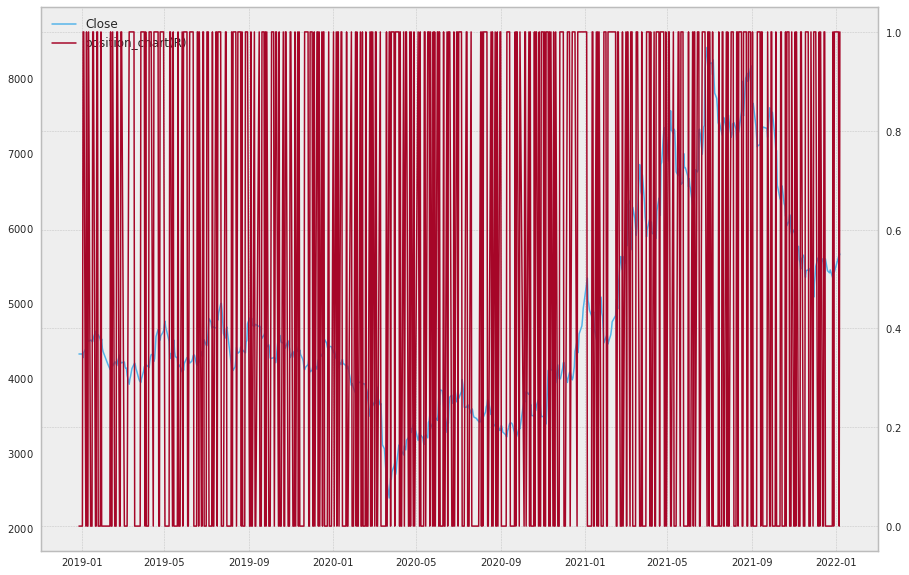

In [ ]:
draw_chart(m1_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m1_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,4380.0,4500.0,4380.0,4317.823242,960612,53.426270,1.252845,4575.324903,0.0,4124.433325,...,0.9998,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,4445.0,4500.0,4390.0,4317.823242,702083,0.000000,0.000000,4564.446418,0.0,4122.198040,...,0.9985,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,4510.0,4510.0,4375.0,4269.253906,715447,-48.569336,-1.124857,4539.142885,0.0,4122.731163,...,0.9930,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,4365.0,4495.0,4325.0,4337.250977,666644,67.997070,1.592716,4509.445830,0.0,4133.486128,...,0.9973,buy,ll,1,1.000000,0.967849,0.967849,-3.22,0.9678,0.9678
2019-01-07,4520.0,4580.0,4485.0,4390.677246,893089,53.426270,1.231800,4512.567085,0.0,4133.279034,...,0.8952,zero,lz,0,0.999912,1.033128,0.999912,-0.01,0.9999,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,5560.0,5570.0,5390.0,5410.000000,1852154,-130.000000,-2.346570,5655.650695,0.0,5285.275330,...,0.9219,buy,zl,1,1.000000,1.000000,1.858411,85.84,0.8086,0.6406
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,0.9998,buy,ll,1,1.000000,1.000000,1.858411,85.84,0.8086,0.6406
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,0.8661,buy,ll,1,1.000000,1.003597,1.865096,86.51,0.8115,0.6429


In [ ]:
# 무위험 수익률
fs.performance(m1_predictions, rf_rate=0.02)

CAGR: 22.38%
Accumulated return: 84.41%
Average return: 0.42%
Benchmark return : 30.59%
Number of trades: 192
Number of win: 91
Hit ratio: 47.40%
Investment period: 3.0yrs
Sharpe ratio: 0.46
MDD: -35.82%
Benchmark MDD: -57.34%


## m2

In [ ]:
m2_predictions['Label'] = m2_predictions['Label'].astype(float)

In [ ]:
m2_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,4924.657718,5015.805369,4831.530201,4796.398606,4.406413e+06,1.846447,0.085845,5192.599484,0.072483,4369.687510,...,10.653790,20.881544,-74.162517,0.471141,0.471141,0.469799,0.471141,3.354362,0.468456,0.795321
std,1360.788156,1395.538767,1323.729435,1339.351574,7.762065e+06,142.421798,3.118719,1472.088228,0.259461,1196.189243,...,129.494992,364.452450,30.655347,0.499502,0.499502,0.499422,0.499502,1.811867,0.499339,0.107375
min,2210.000000,2570.000000,2055.000000,2025.345825,4.392950e+05,-747.969116,-26.970219,3290.912986,0.000000,1975.196281,...,-334.641028,-1084.088235,-149.559594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500700
25%,4040.000000,4090.000000,3990.000000,3924.410889,1.136273e+06,-67.997070,-1.468628,4240.474475,0.000000,3528.465542,...,-52.977657,-171.808824,-100.728067,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.715100
50%,4485.000000,4550.000000,4415.000000,4351.821777,1.952937e+06,0.000000,0.000000,4635.505528,0.000000,4090.360419,...,1.429301,-29.882353,-74.626896,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.812300
75%,5630.000000,5740.000000,5540.000000,5575.202637,4.718234e+06,58.893066,1.356347,5848.628224,0.000000,5157.332478,...,79.356533,208.632353,-48.999219,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.882200
max,8680.000000,8920.000000,8530.000000,8608.191406,8.689161e+07,755.793457,28.537173,8926.694230,1.000000,7175.425600,...,359.502853,1387.411765,-12.577234,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.979600


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m2_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03     buy
2019-01-04     buy
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04     buy
2022-01-05     buy
2022-01-06    zero
2022-01-07     buy
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m2_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zl
2019-01-04    ll
2019-01-07    lz
              ..
2021-12-30    zl
2022-01-04    ll
2022-01-05    ll
2022-01-06    lz
2022-01-07    zl
Name: position, Length: 745, dtype: object

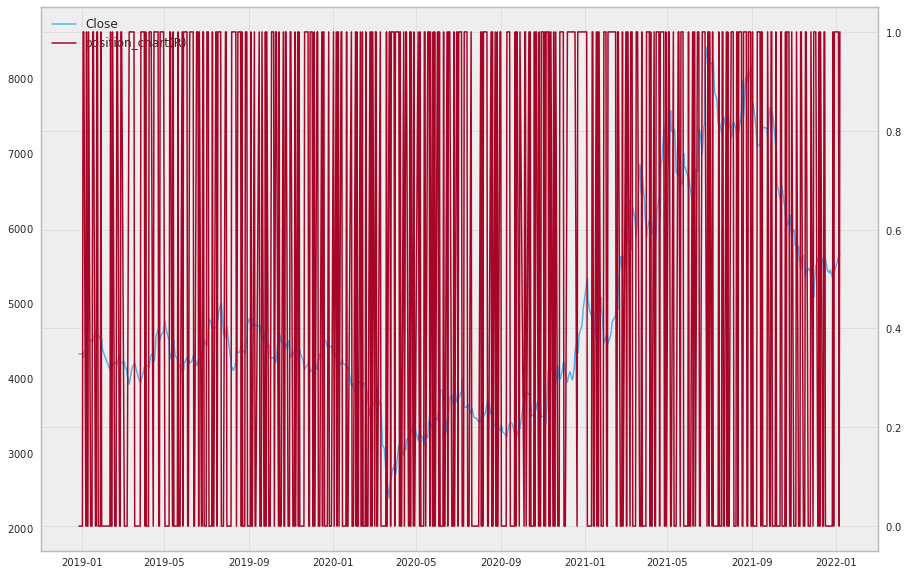

In [ ]:
draw_chart(m2_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m2_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,4380.0,4500.0,4380.0,4317.823242,960612,53.426270,1.252845,4575.324903,0.0,4124.433325,...,0.9333,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,4445.0,4500.0,4390.0,4317.823242,702083,0.000000,0.000000,4564.446418,0.0,4122.198040,...,0.9215,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,4510.0,4510.0,4375.0,4269.253906,715447,-48.569336,-1.124857,4539.142885,0.0,4122.731163,...,0.6884,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,4365.0,4495.0,4325.0,4337.250977,666644,67.997070,1.592716,4509.445830,0.0,4133.486128,...,0.8269,buy,ll,1,1.000000,0.967849,0.967849,-3.22,0.9678,0.9678
2019-01-07,4520.0,4580.0,4485.0,4390.677246,893089,53.426270,1.231800,4512.567085,0.0,4133.279034,...,0.7453,zero,lz,0,0.999912,1.033128,0.999912,-0.01,0.9999,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,5560.0,5570.0,5390.0,5410.000000,1852154,-130.000000,-2.346570,5655.650695,0.0,5285.275330,...,0.5866,buy,zl,1,1.000000,1.000000,1.696641,69.66,0.8343,0.6406
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,0.8145,buy,ll,1,1.000000,1.000000,1.696641,69.66,0.8343,0.6406
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,0.5301,buy,ll,1,1.000000,1.003597,1.702744,70.27,0.8373,0.6429


In [ ]:
# 무위험 수익률
fs.performance(m2_predictions, rf_rate=0.02)

CAGR: 18.76%
Accumulated return: 68.36%
Average return: 0.38%
Benchmark return : 30.59%
Number of trades: 188
Number of win: 87
Hit ratio: 46.28%
Investment period: 3.0yrs
Sharpe ratio: 0.38
MDD: -38.54%
Benchmark MDD: -57.34%


## m3

In [ ]:
m3_predictions['Label'] = m3_predictions['Label'].astype(float)

In [ ]:
m3_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.0
mean,4924.657718,5015.805369,4831.530201,4796.398606,4.406413e+06,1.846447,0.085845,5192.599484,0.072483,4369.687510,...,10.653790,20.881544,-74.162517,0.471141,0.471141,0.469799,0.471141,3.354362,0.471141,1.0
std,1360.788156,1395.538767,1323.729435,1339.351574,7.762065e+06,142.421798,3.118719,1472.088228,0.259461,1196.189243,...,129.494992,364.452450,30.655347,0.499502,0.499502,0.499422,0.499502,1.811867,0.499502,0.0
min,2210.000000,2570.000000,2055.000000,2025.345825,4.392950e+05,-747.969116,-26.970219,3290.912986,0.000000,1975.196281,...,-334.641028,-1084.088235,-149.559594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4040.000000,4090.000000,3990.000000,3924.410889,1.136273e+06,-67.997070,-1.468628,4240.474475,0.000000,3528.465542,...,-52.977657,-171.808824,-100.728067,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.0
50%,4485.000000,4550.000000,4415.000000,4351.821777,1.952937e+06,0.000000,0.000000,4635.505528,0.000000,4090.360419,...,1.429301,-29.882353,-74.626896,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.0
75%,5630.000000,5740.000000,5540.000000,5575.202637,4.718234e+06,58.893066,1.356347,5848.628224,0.000000,5157.332478,...,79.356533,208.632353,-48.999219,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0
max,8680.000000,8920.000000,8530.000000,8608.191406,8.689161e+07,755.793457,28.537173,8926.694230,1.000000,7175.425600,...,359.502853,1387.411765,-12.577234,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.0


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m3_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03     buy
2019-01-04     buy
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04     buy
2022-01-05     buy
2022-01-06    zero
2022-01-07     buy
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m3_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zl
2019-01-04    ll
2019-01-07    lz
              ..
2021-12-30    zl
2022-01-04    ll
2022-01-05    ll
2022-01-06    lz
2022-01-07    zl
Name: position, Length: 745, dtype: object

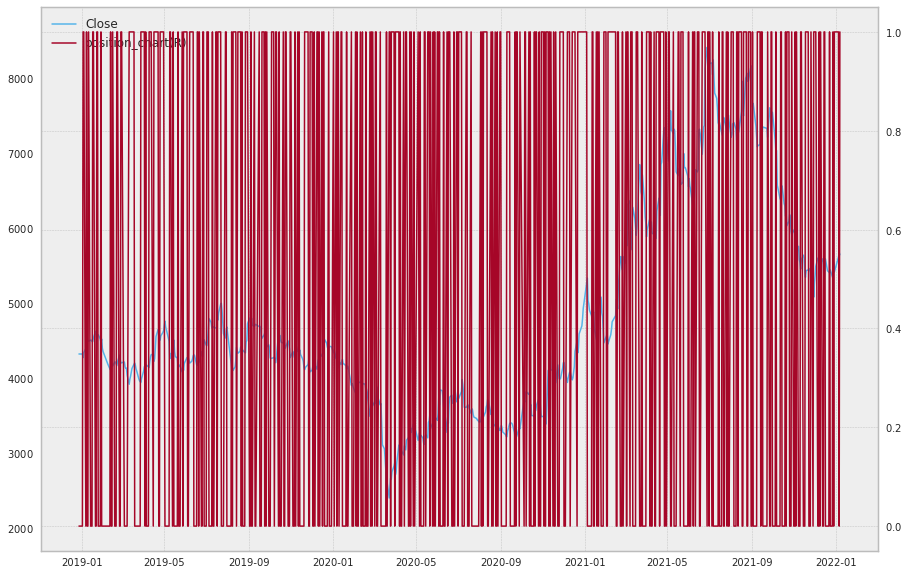

In [ ]:
draw_chart(m3_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m3_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,4380.0,4500.0,4380.0,4317.823242,960612,53.426270,1.252845,4575.324903,0.0,4124.433325,...,1.0,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,4445.0,4500.0,4390.0,4317.823242,702083,0.000000,0.000000,4564.446418,0.0,4122.198040,...,1.0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,4510.0,4510.0,4375.0,4269.253906,715447,-48.569336,-1.124857,4539.142885,0.0,4122.731163,...,1.0,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,4365.0,4495.0,4325.0,4337.250977,666644,67.997070,1.592716,4509.445830,0.0,4133.486128,...,1.0,buy,ll,1,1.000000,0.967849,0.967849,-3.22,0.9678,0.9678
2019-01-07,4520.0,4580.0,4485.0,4390.677246,893089,53.426270,1.231800,4512.567085,0.0,4133.279034,...,1.0,zero,lz,0,0.999912,1.033128,0.999912,-0.01,0.9999,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,5560.0,5570.0,5390.0,5410.000000,1852154,-130.000000,-2.346570,5655.650695,0.0,5285.275330,...,1.0,buy,zl,1,1.000000,1.000000,1.844096,84.41,0.8023,0.6406
2022-01-04,5560.0,5640.0,5520.0,5580.000000,1872407,170.000000,3.142329,5666.309832,0.0,5283.929865,...,1.0,buy,ll,1,1.000000,1.000000,1.844096,84.41,0.8023,0.6406
2022-01-05,5580.0,5680.0,5560.0,5610.000000,3196338,30.000000,0.537634,5669.071177,0.0,5282.685122,...,1.0,buy,ll,1,1.000000,1.003597,1.850729,85.07,0.8052,0.6429


In [ ]:
# 무위험 수익률
fs.performance(m3_predictions, rf_rate=0.02)

CAGR: 22.07%
Accumulated return: 82.99%
Average return: 0.42%
Benchmark return : 30.59%
Number of trades: 193
Number of win: 91
Hit ratio: 47.15%
Investment period: 3.0yrs
Sharpe ratio: 0.45
MDD: -35.82%
Benchmark MDD: -57.34%
